1. CIFAR-10 Veri Seti Kullanımı: CIFAR-10, 10 farklı sınıfa ait renkli görüntülerden oluşan bir veri setidir. Her bir görüntü 32x32 piksel boyutlarındadır.

In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")


# CIFAR-10 veri setini yükleme
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veri boyutlarını yazdırma
print("Eğitim verisi - Giriş boyutu:", X_train.shape)
print("Eğitim verisi - Çıkış boyutu:", y_train.shape)
print("Test verisi - Giriş boyutu:", X_test.shape)
print("Test verisi - Çıkış boyutu:", y_test.shape)


Eğitim verisi - Giriş boyutu: (50000, 32, 32, 3)
Eğitim verisi - Çıkış boyutu: (50000, 1)
Test verisi - Giriş boyutu: (10000, 32, 32, 3)
Test verisi - Çıkış boyutu: (10000, 1)


2. 10 Tane Farklı Veri Seti İncelemesi ve Görselleştirme

Görüntü boyutu: (32, 32, 3)


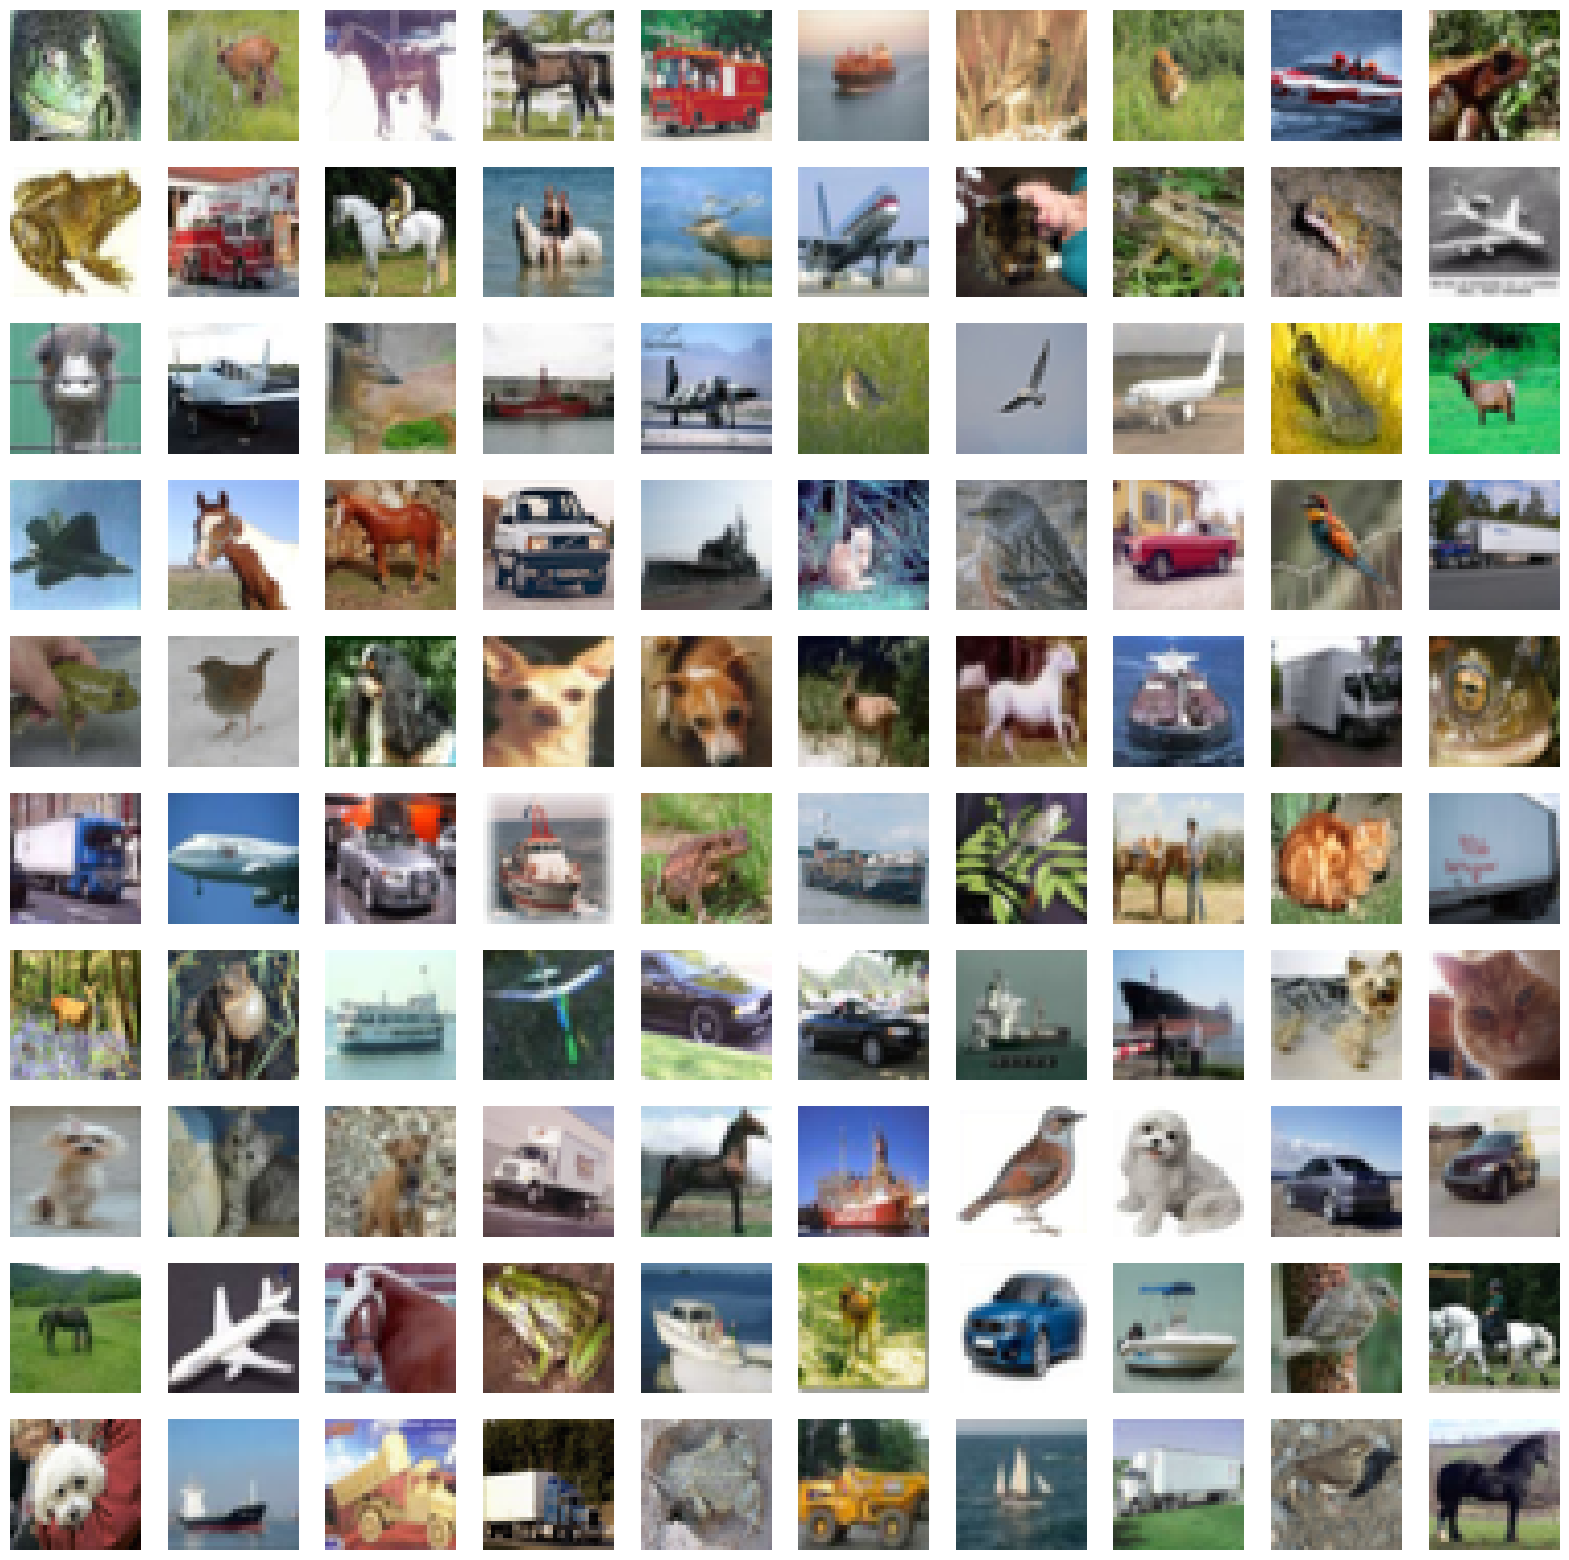

In [7]:
# Görüntü boyutlarını yazdırma
gorsel_boyut = X_train.shape[1:]
print("Görüntü boyutu:", gorsel_boyut)

# 50000 görüntü arasından rastgele 100 tanesini seç
num_samples = 100
random_indices = np.random.choice(X_train.shape[0], num_samples, replace=False)

# Veri setindeki rastgele seçilmiş örnek görüntüleri görselleştirme
plt.figure(figsize=(20, 20))  # Figür boyutunu büyük seçiyoruz
rows = 10
cols = 10

for i, idx in enumerate(random_indices):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_train[idx])
    plt.axis('off')

plt.show()


2.1. Veri Normalizasyonu

In [2]:
# Verileri normalize etme
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

2.2. Veri Düzleştirme

In [3]:
# Veriyi düzleştirme
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

2.3. Veri Standardize etmek

In [4]:
# Veriyi standardize etme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

3. Model Oluşturma ve Eğitme

3.1. Bir derin öğrenme modeli olan Evrişimli Sinir Ağı (Convolutional Neural Network - CNN) kullanarak CIFAR-10 veri seti üzerinde eğitim yapalım.

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3202 - loss: 1.8344 - val_accuracy: 0.4661 - val_loss: 1.4577
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5316 - loss: 1.3070 - val_accuracy: 0.5942 - val_loss: 1.1587
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5972 - loss: 1.1358 - val_accuracy: 0.6258 - val_loss: 1.0576
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6482 - loss: 0.9998 - val_accuracy: 0.6502 - val_loss: 0.9918
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6788 - loss: 0.9199 - val_accuracy: 0.6749 - val_loss: 0.9129
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6998 - loss: 0.8605 - val_accuracy: 0.6812 - val_loss: 0.9115
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7181 - loss: 0.8052 - val_accuracy: 0.6981 - val_loss: 0.8629
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7324 - loss: 0.7714 - val_accuracy: 0.

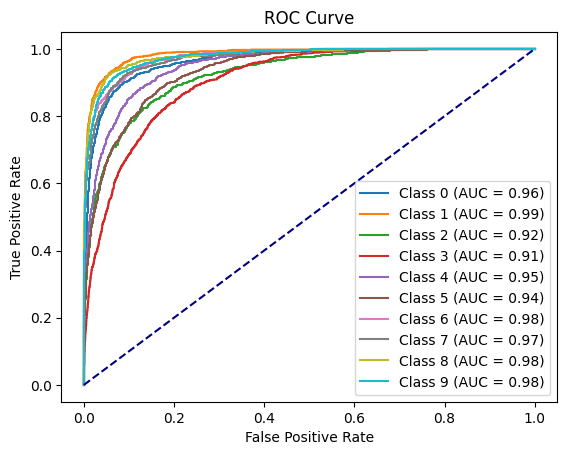

Macro average ROC AUC: 0.9570340277777778


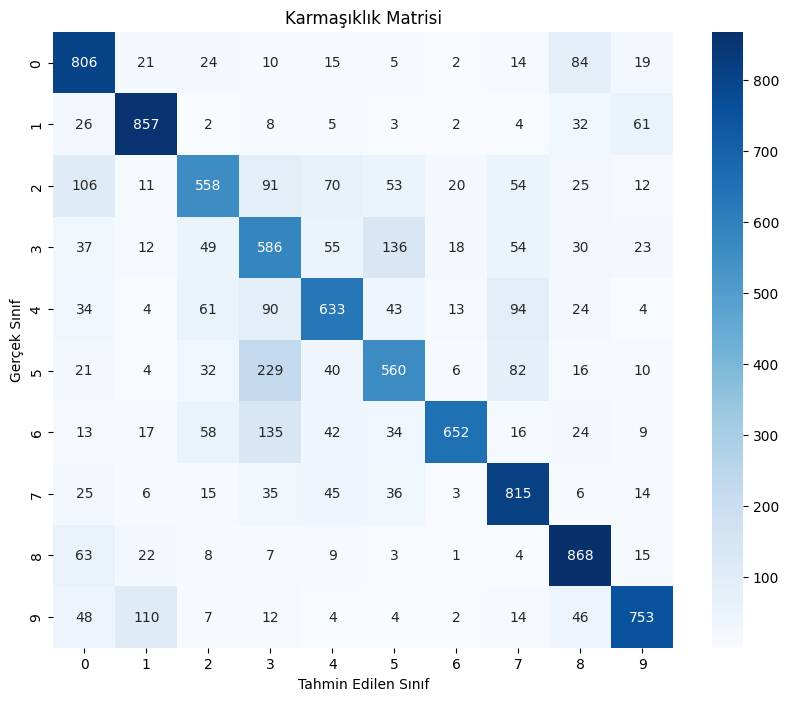

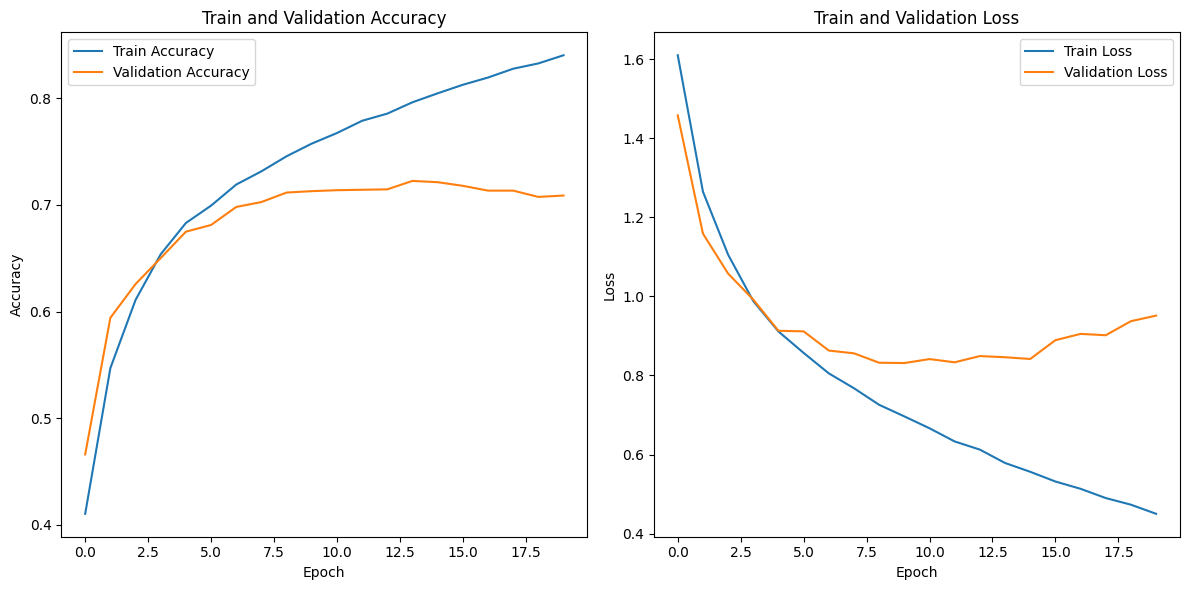

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy


# CNN modeli oluşturma
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Eğitim sonuçlarını değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test doğruluğu:', test_acc)

# Modelin sınıfları tahmin etmesi
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=-1)

# Classification report
print("CNN modeli raporu:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# ROC AUC
# One-vs-Rest ROC AUC Score
roc_auc_scores = []
for i in range(10):  # 10 classes in CIFAR-10
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ROC AUC metriğinin makro ortalamasının alınması
roc_auc_macro_avg = np.mean(roc_auc_scores)
print("Macro average ROC AUC:", roc_auc_macro_avg)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

# Eğitim sürecini görselleştirme
plt.figure(figsize=(12, 6))

# Kesinlik metriğinin görselleştirmesi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

# Kayıp metriğinin görselleştirmesi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Model özetini görüntüleme
model.summary()


Bu adımlar, CIFAR-10 veri seti üzerinde bir Evrişimli Sinir Ağı (CNN) modeli oluşturup eğitimini ve testini gerçekleştirmektedir. Bu şekilde, görüntü işleme üzerine odaklanan bir örnek üzerinde çalışma yapmış olduk. Bu temel adımları farklı derin öğrenme modelleri veya farklı metriklerle genişleterek daha kapsamlı analizler yapabilirsiniz.

3.2. K-Nearest Neighbors (KNN): KNN modelini kullanarak CIFAR-10 gibi yüksek boyutlu ve karmaşık bir veri setinde KNN modeli performansı genellikle düşük olacaktır, ancak temel bir deney olarak gösterebiliriz.

KNN modeli doğruluğu: 0.3416
KNN modeli raporu:
               precision  recall  f1-score   roc_auc
0              0.440750  0.5170  0.475840       NaN
1              0.782051  0.1830  0.296596       NaN
2              0.226003  0.4450  0.299764       NaN
3              0.304878  0.2000  0.241546       NaN
4              0.228717  0.5400  0.321333       NaN
5              0.437380  0.2270  0.298881       NaN
6              0.349677  0.2710  0.305352       NaN
7              0.695971  0.1900  0.298507       NaN
8              0.379754  0.7090  0.494594       NaN
9              0.774566  0.1340  0.228474       NaN
accuracy       0.341600  0.3416  0.341600       NaN
macro avg      0.461975  0.3416  0.326089  0.764159
weighted avg   0.461975  0.3416  0.326089       NaN
accuracy       0.341600     NaN       NaN       NaN
Confusion Matrix:
 [[517   2 108  17  57   2  26   5 266   0]
 [ 97 183 133  43 182  24  63   8 253  14]
 [ 94   2 445  40 265  31  56   7  58   2]
 [ 49   4 224 200 231 1

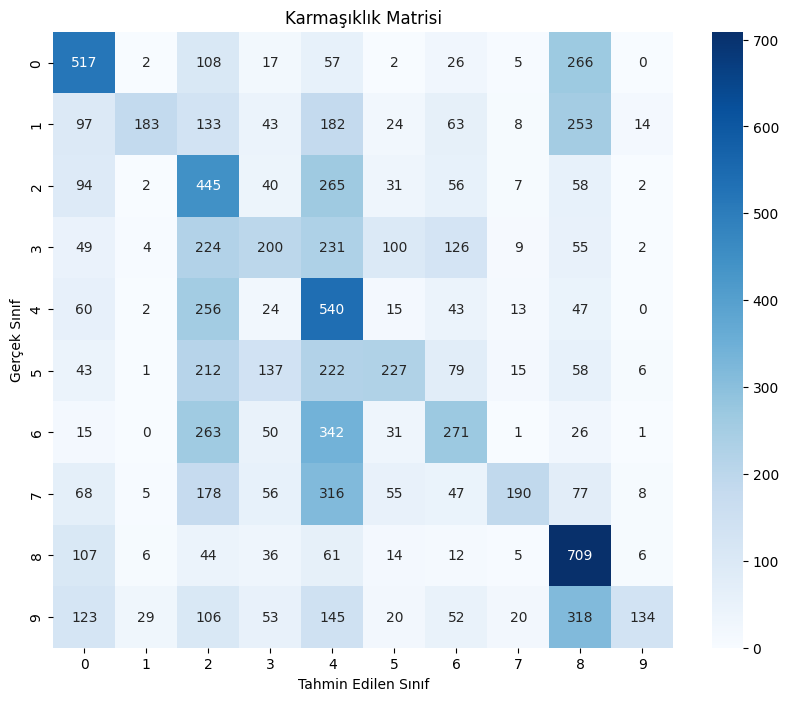

In [7]:
from sklearn.neighbors import KNeighborsClassifier


# KNN modeli oluşturma ve eğitme
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

# Test verisi üzerinde modeli değerlendirme
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Sınıflandırma raporu
report = classification_report(y_test, y_pred_knn, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# ROC AUC puanı
# ROC AUC için çıktıyı ikili hale getirir
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = knn.predict_proba(X_test_scaled)

# Her sınıf için ROC AUC puanını hesaplar
roc_auc_scores = {}
for i in range(y_test_binarized.shape[1]):
    roc_auc_scores[f"Class {i}"] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

# Makro ortalama ROC AUC puanını ekler
roc_auc_scores["macro avg"] = np.mean(list(roc_auc_scores.values()))

# Tabloyu oluştur
table = report_df[["precision", "recall", "f1-score"]]

# roc_auc_scores'u report_df indeksiyle hizalar
roc_auc_column = []
for label in report_df.index:
    if label in roc_auc_scores:
        roc_auc_column.append(roc_auc_scores[label])
    else:
        roc_auc_column.append(np.nan)

table["roc_auc"] = roc_auc_column

# Tek bir değer olduğu için doğruluğu ayrı ayrı ekliyoruz
accuracy_series = pd.Series({"precision": np.nan, "recall": np.nan, "f1-score": np.nan, "roc_auc": np.nan}, name="accuracy")
accuracy_series["precision"] = accuracy_knn

# Tabloya doğruluk_serisini pd.concat kullanarak ekleyin
table = pd.concat([table, accuracy_series.to_frame().T])
print("KNN modeli doğruluğu:", accuracy_knn)
print("KNN modeli raporu:\n", table)

# Karmaşıklık Matrixi Görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()


3.3. Logistic Regression:
Logistic Regression modelini uygulayalım.

Logistic Regression modeli doğruluğu: 0.3672
Logistic Regression modeli raporu:
               precision  recall  f1-score   roc_auc
0              0.412959  0.4270  0.419862       NaN
1              0.425299  0.4270  0.426148       NaN
2              0.276776  0.2610  0.268657       NaN
3              0.237134  0.2350  0.236062       NaN
4              0.330598  0.2820  0.304371       NaN
5              0.295210  0.3020  0.298566       NaN
6              0.392358  0.4210  0.406175       NaN
7              0.420551  0.3970  0.408436       NaN
8              0.454383  0.5080  0.479698       NaN
9              0.405113  0.4120  0.408528       NaN
accuracy       0.367200  0.3672  0.367200       NaN
macro avg      0.365038  0.3672  0.365650  0.790764
weighted avg   0.365038  0.3672  0.365650       NaN
accuracy       0.367200     NaN       NaN       NaN
Confusion Matrix:
 [[427  49  58  48  24  42  18  55 203  76]
 [ 73 427  34  48  25  38  47  47  81 180]
 [100  36 261  89 122  95 128  84 

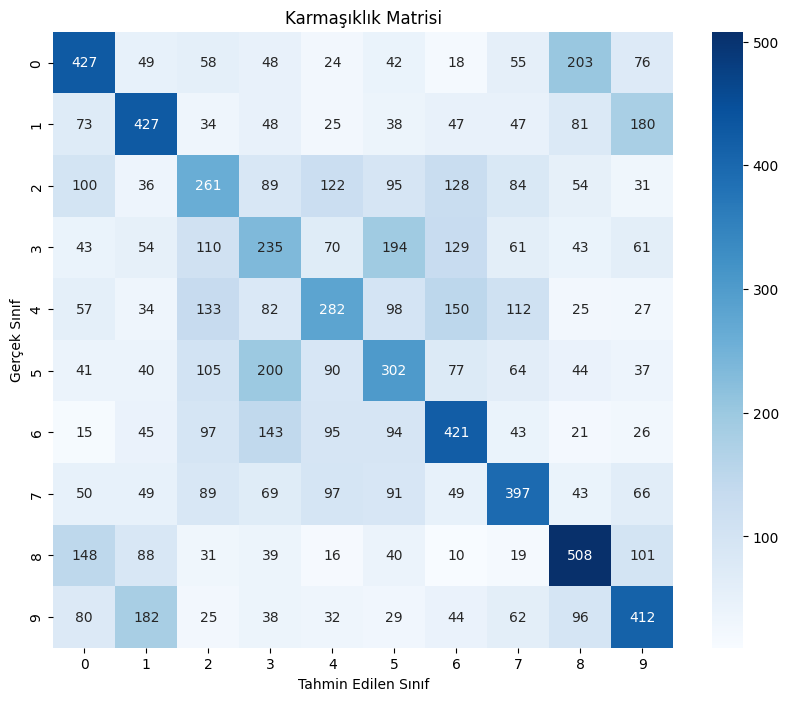

In [9]:
from sklearn.linear_model import LogisticRegression


# Logistic Regression modeli oluşturma ve eğitme
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Test verisi üzerinde modeli değerlendirme
y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Precision, Recall, F1-Score
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')

# Classification report
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)
report_logreg_df = pd.DataFrame(report_logreg).transpose()

# ROC AUC score
# Binarize the output for ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)

# Compute ROC AUC score for each class
roc_auc_scores_logreg = {}
for i in range(y_test_binarized.shape[1]):
    roc_auc_scores_logreg[f"Class {i}"] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_logreg[:, i])

# Add the macro average ROC AUC score
roc_auc_scores_logreg["macro avg"] = np.mean(list(roc_auc_scores_logreg.values()))

# Create the table
table_logreg = report_logreg_df[["precision", "recall", "f1-score"]]

# Align roc_auc_scores with the report_df index
roc_auc_column_logreg = []
for label in report_logreg_df.index:
    if label in roc_auc_scores_logreg:
        roc_auc_column_logreg.append(roc_auc_scores_logreg[label])
    else:
        roc_auc_column_logreg.append(np.nan)

table_logreg["roc_auc"] = roc_auc_column_logreg

# Adding accuracy separately as it's a single value
accuracy_series_logreg = pd.Series({"precision": np.nan, "recall": np.nan, "f1-score": np.nan, "roc_auc": np.nan}, name="accuracy")
accuracy_series_logreg["precision"] = accuracy_logreg

# Append accuracy_series to the table using pd.concat
table_logreg = pd.concat([table_logreg, accuracy_series_logreg.to_frame().T])

# Print the results
print("Logistic Regression modeli doğruluğu:", accuracy_logreg)
print("Logistic Regression modeli raporu:\n", table_logreg)

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()


3.4. Decision Tree:
Decision Tree modelini kullanalım.

Decision Tree modeli doğruluğu: 0.269
Decision Tree modeli raporu:
               precision  recall  f1-score   roc_auc
0              0.333648   0.353  0.343052       NaN
1              0.275648   0.266  0.270738       NaN
2              0.201336   0.211  0.206055       NaN
3              0.180785   0.175  0.177846       NaN
4              0.227144   0.241  0.233867       NaN
5              0.220766   0.219  0.219880       NaN
6              0.300728   0.289  0.294748       NaN
7              0.279698   0.259  0.268951       NaN
8              0.378014   0.392  0.384880       NaN
9              0.289634   0.285  0.287298       NaN
accuracy       0.269000   0.269  0.269000       NaN
macro avg      0.268740   0.269  0.268731  0.593889
weighted avg   0.268740   0.269  0.268731       NaN
accuracy       0.269000     NaN       NaN       NaN
Confusion Matrix:
 [[353  80  85  54  56  49  31  55 154  83]
 [ 73 266  65  78  70  52  50  63 113 170]
 [ 94  47 211  92 151 120 102  82  41  60]
 [ 6

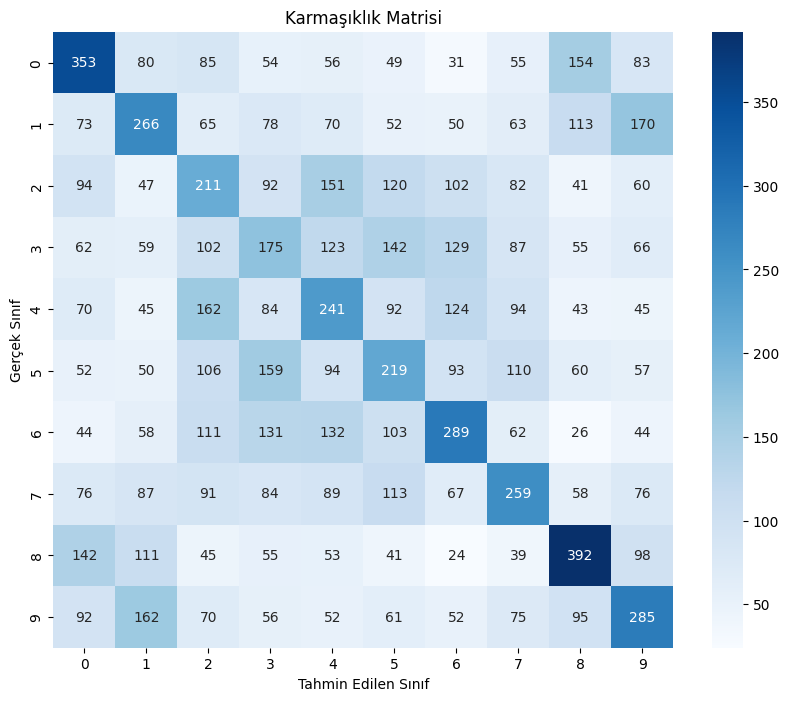

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree modeli oluşturma ve eğitme
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

# Test verisi üzerinde modeli değerlendirme
y_pred_dt = dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Precision, Recall, F1-Score
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

# Classification report
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_dt_df = pd.DataFrame(report_dt).transpose()

# ROC AUC score
# Binarize the output for ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba_dt = dt.predict_proba(X_test_scaled)

# Compute ROC AUC score for each class
roc_auc_scores_dt = {}
for i in range(y_test_binarized.shape[1]):
    roc_auc_scores_dt[f"Class {i}"] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_dt[:, i])

# Add the macro average ROC AUC score
roc_auc_scores_dt["macro avg"] = np.mean(list(roc_auc_scores_dt.values()))

# Create the table
table_dt = report_dt_df[["precision", "recall", "f1-score"]]

# Align roc_auc_scores with the report_df index
roc_auc_column_dt = []
for label in report_dt_df.index:
    if label in roc_auc_scores_dt:
        roc_auc_column_dt.append(roc_auc_scores_dt[label])
    else:
        roc_auc_column_dt.append(np.nan)

table_dt["roc_auc"] = roc_auc_column_dt

# Adding accuracy separately as it's a single value
accuracy_series_dt = pd.Series({"precision": np.nan, "recall": np.nan, "f1-score": np.nan, "roc_auc": np.nan}, name="accuracy")
accuracy_series_dt["precision"] = accuracy_dt

# Append accuracy_series to the table using pd.concat
table_dt = pd.concat([table_dt, accuracy_series_dt.to_frame().T])

# Print the results
print("Decision Tree modeli doğruluğu:", accuracy_dt)
print("Decision Tree modeli raporu:\n", table_dt)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", conf_matrix_dt)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()


3.5. Random Forest:
Random Forest modelini uygulayalım.

Random Forest modeli doğruluğu: 0.4824
Random Forest modeli raporu:
               precision  recall  f1-score   roc_auc
0              0.557000  0.5570  0.557000       NaN
1              0.535411  0.5670  0.550753       NaN
2              0.394527  0.3460  0.368673       NaN
3              0.364198  0.2950  0.325967       NaN
4              0.419287  0.4000  0.409417       NaN
5              0.443839  0.4070  0.424622       NaN
6              0.479285  0.5900  0.528911       NaN
7              0.520833  0.4750  0.496862       NaN
8              0.577965  0.6190  0.597779       NaN
9              0.485885  0.5680  0.523744       NaN
accuracy       0.482400  0.4824  0.482400       NaN
macro avg      0.477823  0.4824  0.478373  0.863854
weighted avg   0.477823  0.4824  0.478373       NaN
accuracy       0.482400     NaN       NaN       NaN
Confusion Matrix:
 [[557  45  59  18  26  19  23  26 169  58]
 [ 24 567  18  35  18  29  37  35  63 174]
 [102  43 346  79 143  60 110  62  27  28]
 [ 

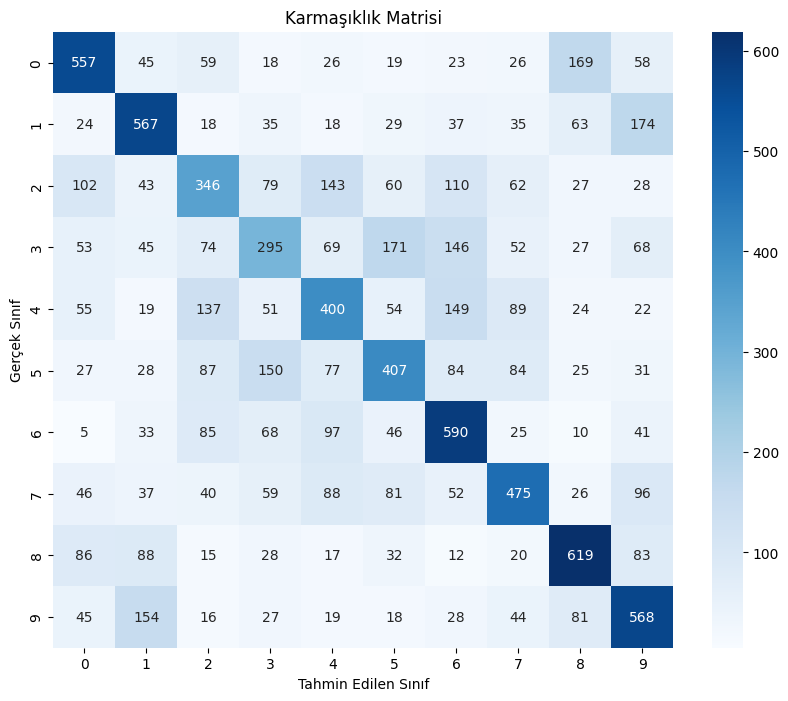

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modeli oluşturma ve eğitme
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train_scaled, y_train)

# Test verisi üzerinde modeli değerlendirme
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Precision, Recall, F1-Score
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

# Classification report
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_rf_df = pd.DataFrame(report_rf).transpose()

# ROC AUC score
# Binarize the output for ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba_rf = rf.predict_proba(X_test_scaled)

# Compute ROC AUC score for each class
roc_auc_scores_rf = {}
for i in range(y_test_binarized.shape[1]):
    roc_auc_scores_rf[f"Class {i}"] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_rf[:, i])

# Add the macro average ROC AUC score
roc_auc_scores_rf["macro avg"] = np.mean(list(roc_auc_scores_rf.values()))

# Create the table
table_rf = report_rf_df[["precision", "recall", "f1-score"]]

# Align roc_auc_scores with the report_df index
roc_auc_column_rf = []
for label in report_rf_df.index:
    if label in roc_auc_scores_rf:
        roc_auc_column_rf.append(roc_auc_scores_rf[label])
    else:
        roc_auc_column_rf.append(np.nan)

table_rf["roc_auc"] = roc_auc_column_rf

# Adding accuracy separately as it's a single value
accuracy_series_rf = pd.Series({"precision": np.nan, "recall": np.nan, "f1-score": np.nan, "roc_auc": np.nan}, name="accuracy")
accuracy_series_rf["precision"] = accuracy_rf

# Append accuracy_series to the table using pd.concat
table_rf = pd.concat([table_rf, accuracy_series_rf.to_frame().T])

# Print the results
print("Random Forest modeli doğruluğu:", accuracy_rf)
print("Random Forest modeli raporu:\n", table_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()


3.6. LightGBM:
LightGBM modelini kullanalım.

LightGBM modeli doğruluğu: 0.5311
LightGBM modeli raporu:
               precision  recall  f1-score   roc_auc
0              0.590643  0.6060  0.598223       NaN
1              0.645455  0.6390  0.642211       NaN
2              0.418322  0.3790  0.397692       NaN
3              0.368697  0.3510  0.359631       NaN
4              0.461874  0.4240  0.442127       NaN
5              0.464135  0.4400  0.451745       NaN
6              0.534942  0.6430  0.584015       NaN
7              0.587302  0.5550  0.570694       NaN
8              0.633776  0.6680  0.650438       NaN
9              0.572238  0.6060  0.588635       NaN
accuracy       0.531100  0.5311  0.531100       NaN
macro avg      0.527738  0.5311  0.528541  0.896738
weighted avg   0.527738  0.5311  0.528541       NaN
accuracy       0.531100     NaN       NaN       NaN
Confusion Matrix:
 [[606  29  55  24  29  16  23  29 151  38]
 [ 33 639  12  32  15  21  21  17  48 162]
 [ 81  25 379  91 133  69 109  66  26  21]
 [ 38  17  92

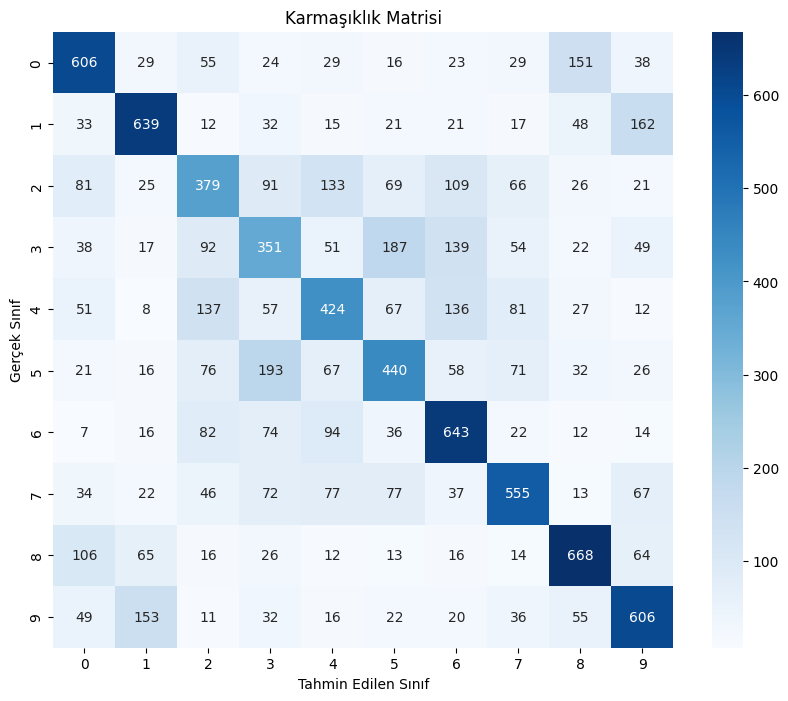

In [25]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

# LightGBM modeli oluşturma ve eğitme
lgbm = LGBMClassifier(verbosity=-1)
lgbm.fit(X_train_flat, y_train)

# Test verisi üzerinde modeli değerlendirme
y_pred_lgbm = lgbm.predict(X_test_flat)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

# Precision, Recall, F1-Score
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='macro')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='macro')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='macro')

# Classification report
report_lgbm = classification_report(y_test, y_pred_lgbm, output_dict=True)
report_lgbm_df = pd.DataFrame(report_lgbm).transpose()

# ROC AUC score
# Binarize the output for ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba_lgbm = lgbm.predict_proba(X_test_flat)

# Compute ROC AUC score for each class
roc_auc_scores_lgbm = {}
for i in range(y_test_binarized.shape[1]):
    roc_auc_scores_lgbm[f"Class {i}"] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_lgbm[:, i])

# Add the macro average ROC AUC score
roc_auc_scores_lgbm["macro avg"] = np.mean(list(roc_auc_scores_lgbm.values()))

# Create the table
table_lgbm = report_lgbm_df[["precision", "recall", "f1-score"]]

# Align roc_auc_scores with the report_df index
roc_auc_column_lgbm = []
for label in report_lgbm_df.index:
    if label in roc_auc_scores_lgbm:
        roc_auc_column_lgbm.append(roc_auc_scores_lgbm[label])
    else:
        roc_auc_column_lgbm.append(np.nan)

table_lgbm["roc_auc"] = roc_auc_column_lgbm

# Adding accuracy separately as it's a single value
accuracy_series_lgbm = pd.Series({"precision": np.nan, "recall": np.nan, "f1-score": np.nan, "roc_auc": np.nan}, name="accuracy")
accuracy_series_lgbm["precision"] = accuracy_lgbm

# Append accuracy_series to the table using pd.concat
table_lgbm = pd.concat([table_lgbm, accuracy_series_lgbm.to_frame().T])

# Print the results
print("LightGBM modeli doğruluğu:", accuracy_lgbm)
print("LightGBM modeli raporu:\n", table_lgbm)

# Confusion Matrix
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print("Confusion Matrix:\n", conf_matrix_lgbm)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()



3.7. XGBoost:
XGBoost modelini kullanalım.

XGBoost modeli doğruluğu: 0.5389
XGBoost modeli raporu:
               precision  recall  f1-score   roc_auc
0              0.613333  0.5980  0.605570       NaN
1              0.657143  0.6440  0.650505       NaN
2              0.427039  0.3980  0.412008       NaN
3              0.377033  0.3710  0.373992       NaN
4              0.454087  0.4500  0.452034       NaN
5              0.470292  0.4670  0.468640       NaN
6              0.552200  0.6400  0.592867       NaN
7              0.601741  0.5530  0.576342       NaN
8              0.647283  0.6790  0.662762       NaN
9              0.578585  0.5890  0.583746       NaN
accuracy       0.538900  0.5389  0.538900       NaN
macro avg      0.537874  0.5389  0.537847  0.899019
weighted avg   0.537874  0.5389  0.537847       NaN
accuracy       0.538900     NaN       NaN       NaN
Confusion Matrix:
 [[598  21  68  26  31  18  26  25 137  50]
 [ 34 644  18  30   9  18  16  30  51 150]
 [ 75  22 398  91 154  65 102  55  19  19]
 [ 26  17  87 3

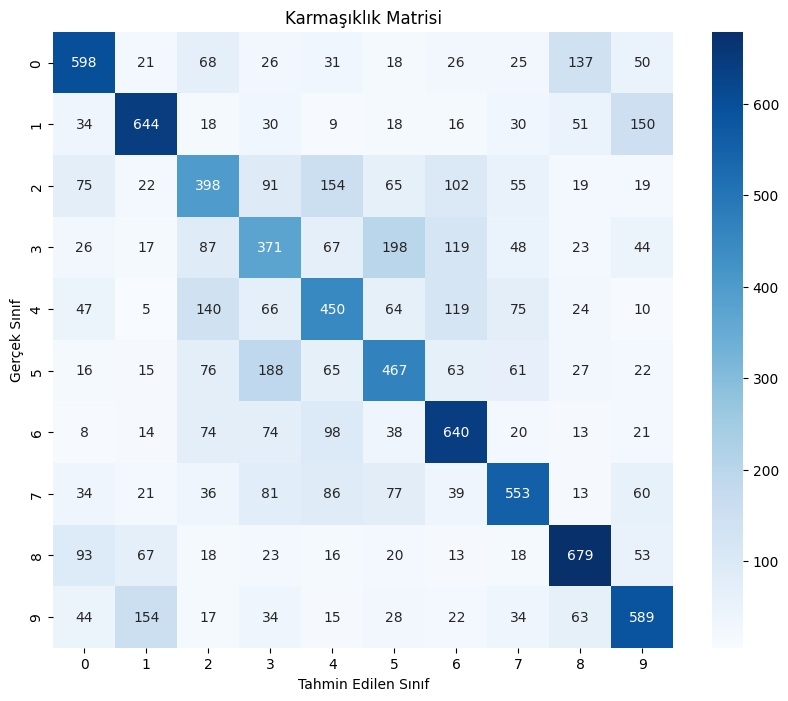

In [26]:
import xgboost as xgb
from xgboost import XGBClassifier

# XGBoost modeli oluşturma ve eğitme
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_flat, y_train)

# Test verisi üzerinde modeli değerlendirme
y_pred_xgb = xgb_model.predict(X_test_flat)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Precision, Recall, F1-Score
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

# Classification report
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_xgb_df = pd.DataFrame(report_xgb).transpose()

# ROC AUC score
# Binarize the output for ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba_xgb = xgb_model.predict_proba(X_test_flat)

# Compute ROC AUC score for each class
roc_auc_scores_xgb = {}
for i in range(y_test_binarized.shape[1]):
    roc_auc_scores_xgb[f"Class {i}"] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_xgb[:, i])

# Add the macro average ROC AUC score
roc_auc_scores_xgb["macro avg"] = np.mean(list(roc_auc_scores_xgb.values()))

# Create the table
table_xgb = report_xgb_df[["precision", "recall", "f1-score"]]

# Align roc_auc_scores with the report_df index
roc_auc_column_xgb = []
for label in report_xgb_df.index:
    if label in roc_auc_scores_xgb:
        roc_auc_column_xgb.append(roc_auc_scores_xgb[label])
    else:
        roc_auc_column_xgb.append(np.nan)

table_xgb["roc_auc"] = roc_auc_column_xgb

# Adding accuracy separately as it's a single value
accuracy_series_xgb = pd.Series({"precision": np.nan, "recall": np.nan, "f1-score": np.nan, "roc_auc": np.nan}, name="accuracy")
accuracy_series_xgb["precision"] = accuracy_xgb

# Append accuracy_series to the table using pd.concat
table_xgb = pd.concat([table_xgb, accuracy_series_xgb.to_frame().T])

# Print the results
print("XGBoost modeli doğruluğu:", accuracy_xgb)
print("XGBoost modeli raporu:\n", table_xgb)

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()


3.8. CatBoost:
CatBoost modelini kullanalım.

CatBoost modeli doğruluğu: 0.4494
CatBoost modeli raporu:
               precision  recall  f1-score   roc_auc
0              0.517040  0.5310  0.523927       NaN
1              0.529880  0.5320  0.530938       NaN
2              0.351288  0.3000  0.323625       NaN
3              0.311085  0.2610  0.283850       NaN
4              0.390792  0.3650  0.377456       NaN
5              0.395101  0.3710  0.382671       NaN
6              0.424862  0.5400  0.475561       NaN
7              0.476608  0.4890  0.482725       NaN
8              0.542543  0.5930  0.566651       NaN
9              0.505429  0.5120  0.508693       NaN
accuracy       0.449400  0.4494  0.449400       NaN
macro avg      0.444463  0.4494  0.445610  0.857556
weighted avg   0.444463  0.4494  0.445610       NaN
accuracy       0.449400     NaN       NaN       NaN
Confusion Matrix:
 [[531  34  62  26  26  24  29  31 182  55]
 [ 40 532  16  38  24  36  36  34  75 169]
 [ 94  33 300  80 149  75 133  91  25  20]
 [ 43  39  86

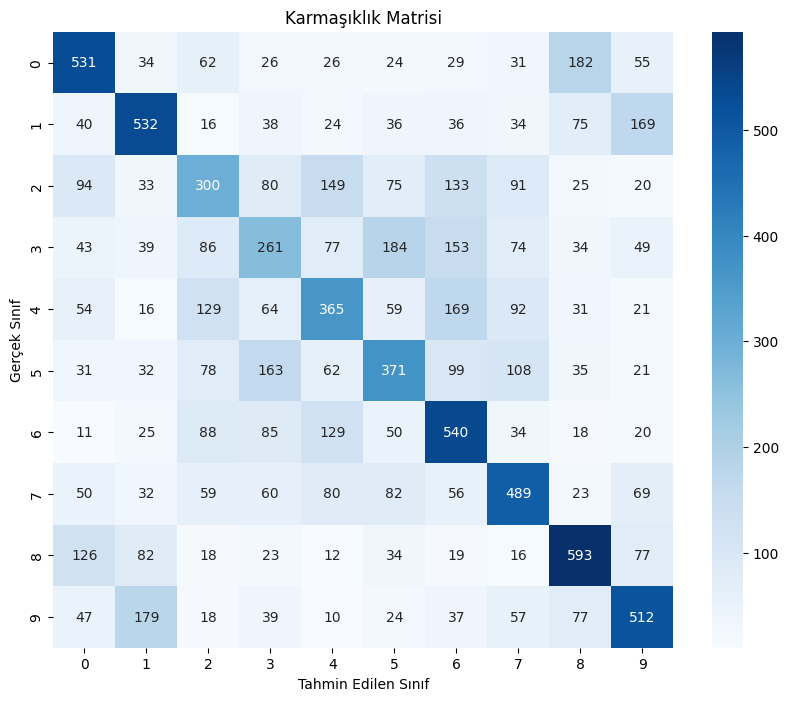

In [27]:
from catboost import CatBoostClassifier

# CatBoost modeli oluşturma ve eğitme
catboost_model = CatBoostClassifier(iterations=50, learning_rate=0.5, verbose=False)
catboost_model.fit(X_train_flat, y_train)

# Test verisi üzerinde modeli değerlendirme
y_pred_catboost = catboost_model.predict(X_test_flat)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)

# Precision, Recall, F1-Score
precision_catboost = precision_score(y_test, y_pred_catboost, average='macro')
recall_catboost = recall_score(y_test, y_pred_catboost, average='macro')
f1_catboost = f1_score(y_test, y_pred_catboost, average='macro')

# Classification report
report_catboost = classification_report(y_test, y_pred_catboost, output_dict=True)
report_catboost_df = pd.DataFrame(report_catboost).transpose()

# ROC AUC score
# Binarize the output for ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba_catboost = catboost_model.predict_proba(X_test_flat)

# Compute ROC AUC score for each class
roc_auc_scores_catboost = {}
for i in range(y_test_binarized.shape[1]):
    roc_auc_scores_catboost[f"Class {i}"] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_catboost[:, i])

# Add the macro average ROC AUC score
roc_auc_scores_catboost["macro avg"] = np.mean(list(roc_auc_scores_catboost.values()))

# Create the table
table_catboost = report_catboost_df[["precision", "recall", "f1-score"]]

# Align roc_auc_scores with the report_df index
roc_auc_column_catboost = []
for label in report_catboost_df.index:
    if label in roc_auc_scores_catboost:
        roc_auc_column_catboost.append(roc_auc_scores_catboost[label])
    else:
        roc_auc_column_catboost.append(np.nan)

table_catboost["roc_auc"] = roc_auc_column_catboost

# Adding accuracy separately as it's a single value
accuracy_series_catboost = pd.Series({"precision": np.nan, "recall": np.nan, "f1-score": np.nan, "roc_auc": np.nan}, name="accuracy")
accuracy_series_catboost["precision"] = accuracy_catboost

# Append accuracy_series to the table using pd.concat
table_catboost = pd.concat([table_catboost, accuracy_series_catboost.to_frame().T])

# Print the results
print("CatBoost modeli doğruluğu:", accuracy_catboost)
print("CatBoost modeli raporu:\n", table_catboost)

# Confusion Matrix
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
print("Confusion Matrix:\n", conf_matrix_catboost)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_catboost, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()


3.9. Gradient Boosting Machine (GBM):
GBM modelini kullanalım.

Gradient Boosting modeli doğruluğu: 0.3369
Gradient Boosting modeli raporu:
               precision  recall  f1-score   roc_auc
0              0.400411  0.3900  0.395137       NaN
1              0.372279  0.3250  0.347037       NaN
2              0.232625  0.2410  0.236739       NaN
3              0.228538  0.1970  0.211600       NaN
4              0.288911  0.2970  0.292899       NaN
5              0.294964  0.2870  0.290928       NaN
6              0.334239  0.3690  0.350760       NaN
7              0.336873  0.3490  0.342829       NaN
8              0.457014  0.5050  0.479810       NaN
9              0.405352  0.4090  0.407168       NaN
accuracy       0.336900  0.3369  0.336900       NaN
macro avg      0.335121  0.3369  0.335491  0.754138
weighted avg   0.335121  0.3369  0.335491       NaN
accuracy       0.336900     NaN       NaN       NaN
Confusion Matrix:
 [[390  53 114  32  51  43  29  55 184  49]
 [102 325  43  67  34  62  44  60  79 184]
 [ 83  41 241  86 149  81 147  95  49 

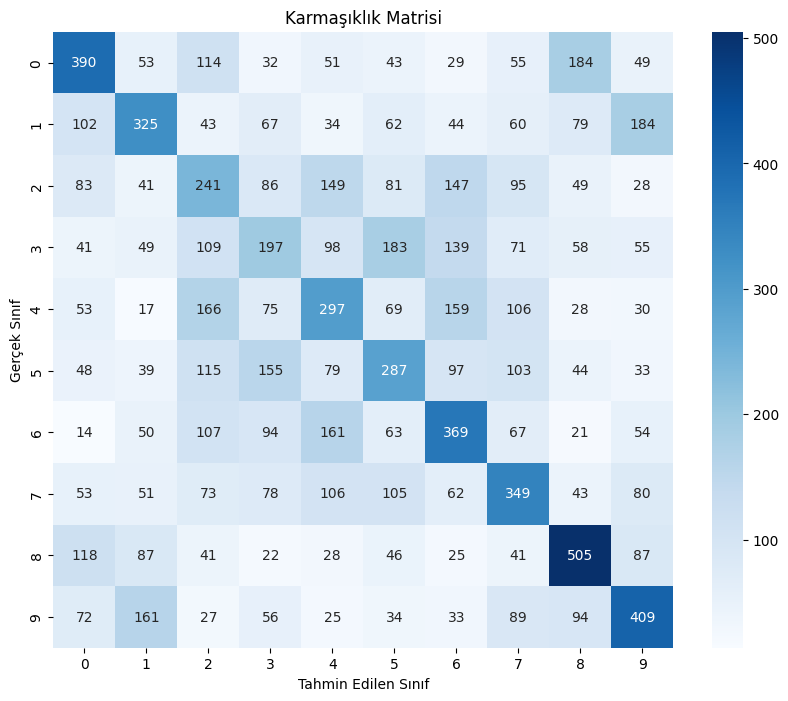

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Eğitim verilerinin boyutunu küçültme (50.000 yerine 1.000 örnek)
sample_size = 10000
indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
X_train_sample = X_train[indices]
y_train_sample = y_train[indices]

# Veriyi 1D yapma (her görüntü 32x32x3 -> 3072 vektör)
X_train_flat = X_train_sample.reshape((X_train_sample.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))
y_train_sample = y_train_sample.flatten()
y_test = y_test.flatten()

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# GBM modeli oluşturma ve eğitme
gbm = GradientBoostingClassifier(n_estimators=10, learning_rate=1)
gbm.fit(X_train_scaled, y_train_sample)

# Test verisi üzerinde modeli değerlendirme
y_pred_gbm = gbm.predict(X_test_scaled)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

# Precision, Recall, F1-Score
precision_gbm = precision_score(y_test, y_pred_gbm, average='macro')
recall_gbm = recall_score(y_test, y_pred_gbm, average='macro')
f1_gbm = f1_score(y_test, y_pred_gbm, average='macro')

# Classification report
report_gbm = classification_report(y_test, y_pred_gbm, output_dict=True)
report_gbm_df = pd.DataFrame(report_gbm).transpose()

# ROC AUC score
# Binarize the output for ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba_gbm = gbm.predict_proba(X_test_scaled)

# Compute ROC AUC score for each class
roc_auc_scores_gbm = {}
for i in range(y_test_binarized.shape[1]):
    roc_auc_scores_gbm[f"Class {i}"] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_gbm[:, i])

# Add the macro average ROC AUC score
roc_auc_scores_gbm["macro avg"] = np.mean(list(roc_auc_scores_gbm.values()))

# Create the table
table_gbm = report_gbm_df[["precision", "recall", "f1-score"]]

# Align roc_auc_scores with the report_df index
roc_auc_column_gbm = []
for label in report_gbm_df.index:
    if label in roc_auc_scores_gbm:
        roc_auc_column_gbm.append(roc_auc_scores_gbm[label])
    else:
        roc_auc_column_gbm.append(np.nan)

table_gbm["roc_auc"] = roc_auc_column_gbm

# Adding accuracy separately as it's a single value
accuracy_series_gbm = pd.Series({"precision": np.nan, "recall": np.nan, "f1-score": np.nan, "roc_auc": np.nan}, name="accuracy")
accuracy_series_gbm["precision"] = accuracy_gbm

# Append accuracy_series to the table using pd.concat
table_gbm = pd.concat([table_gbm, accuracy_series_gbm.to_frame().T])

# Print the results
print("Gradient Boosting modeli doğruluğu:", accuracy_gbm)
print("Gradient Boosting modeli raporu:\n", table_gbm)

# Confusion Matrix
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print("Confusion Matrix:\n", conf_matrix_gbm)

# Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gbm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()


3.10. Support Vector Machine (SVM): SVM modelini kullanarak devam edelim. Burada SVC (Support Vector Classifier) kullanacağız.

Accuracy: 0.49566666666666664
Precision: 0.4925348714712771
Recall: 0.4946243035183384
F1 Score: 0.4913543031779099
ROC AUC Score: 0.8749791575979693

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.53      0.55       299
           1       0.61      0.62      0.61       287
           2       0.41      0.38      0.40       318
           3       0.33      0.33      0.33       295
           4       0.41      0.40      0.40       299
           5       0.44      0.34      0.38       290
           6       0.49      0.60      0.54       307
           7       0.54      0.50      0.52       286
           8       0.57      0.71      0.63       316
           9       0.55      0.54      0.55       303

    accuracy                           0.50      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.50      0.49      3000



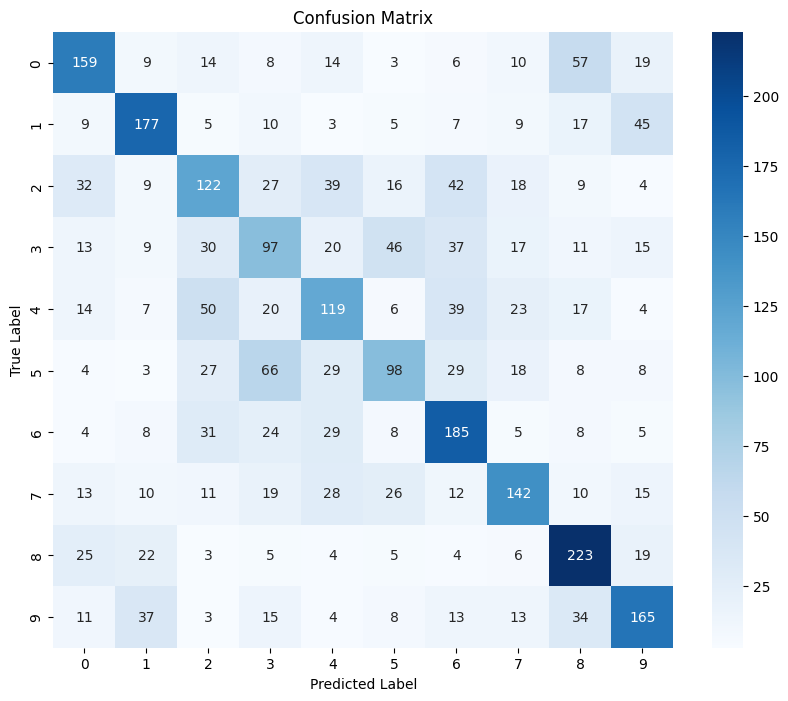

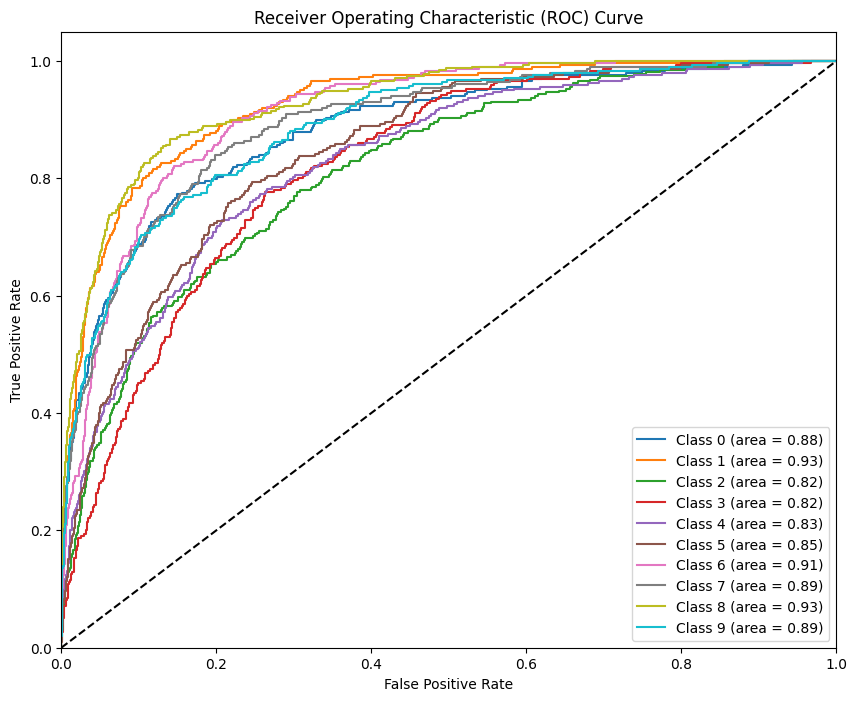

In [2]:
from sklearn.svm import SVC

# Veriyi yeniden şekillendirme ve normalizasyon
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Çıkış değerlerini düzleştirme
y_train = y_train.flatten()
y_test = y_test.flatten()

# Veri setini küçültme (hızlı sonuç almak için)
X_train, y_train = X_train[:15000], y_train[:15000]
X_test, y_test = X_test[:3000], y_test[:3000]

# SVM modelini tanımlama ve eğitme
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Tahminler
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)

# Metriklerin hesaplanması
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(label_binarize(y_test, classes=range(10)), y_prob, average='macro', multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Sınıflandırma raporu
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Eğrisi
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=range(10))[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Buradaki SVM modelinde ise Cifar-10 verisetinin tüm görsellerinin hesaplanması sağlanmıştır. Yani 60.000 veri 350 dakika da hesaplandı.

Accuracy: 0.5437
Precision: 0.5425592446958151
Recall: 0.5437
F1 Score: 0.542117800212692
ROC AUC Score: 0.8990128333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.62      0.62      1000
           1       0.64      0.65      0.64      1000
           2       0.42      0.41      0.41      1000
           3       0.38      0.39      0.38      1000
           4       0.47      0.43      0.45      1000
           5       0.49      0.43      0.46      1000
           6       0.54      0.64      0.58      1000
           7       0.63      0.57      0.60      1000
           8       0.65      0.69      0.67      1000
           9       0.59      0.61      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000



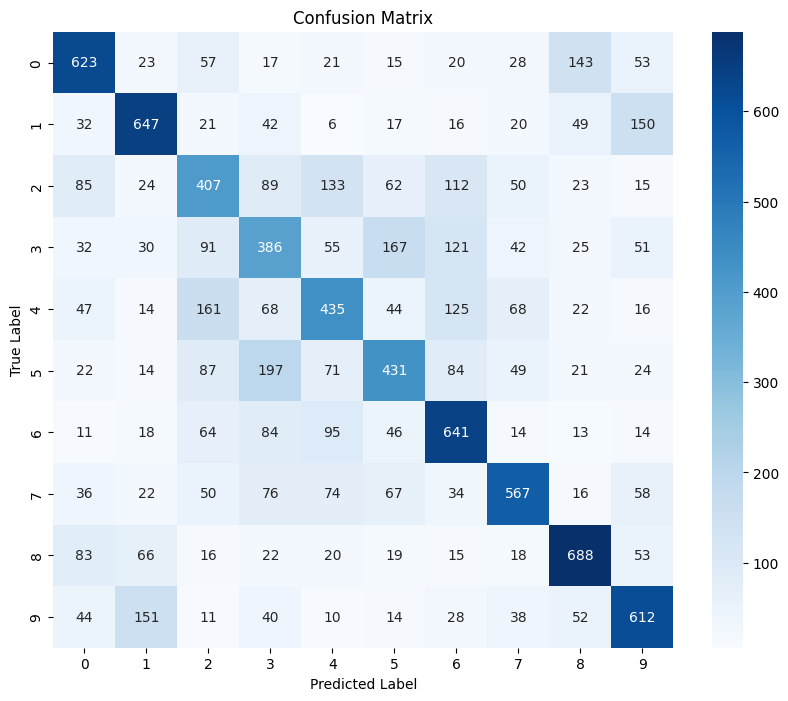

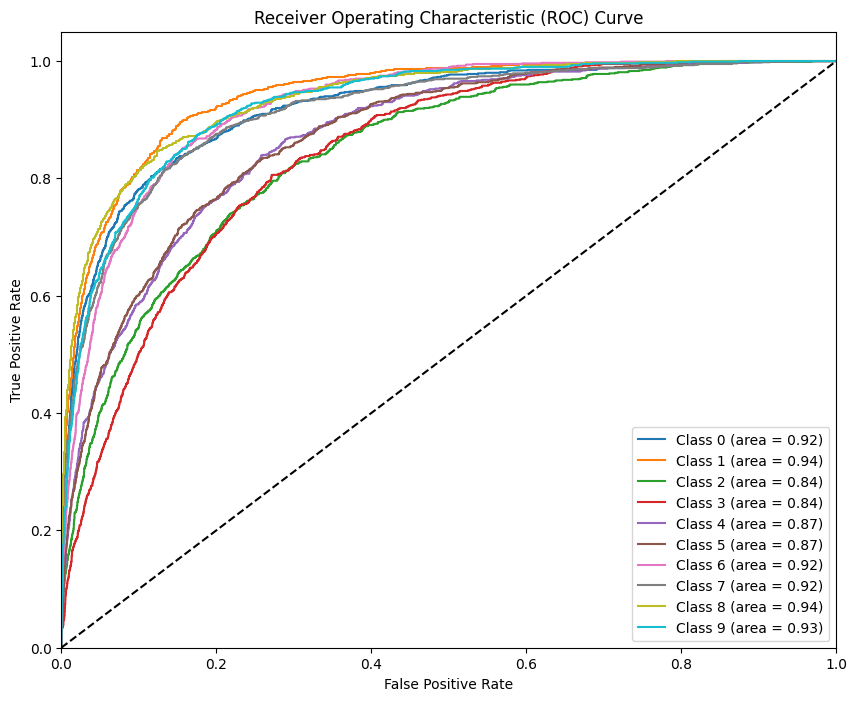

In [2]:
from sklearn.svm import SVC

# Veriyi yeniden şekillendirme ve normalizasyon
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Çıkış değerlerini düzleştirme
y_train = y_train.flatten()
y_test = y_test.flatten()

# Veri setini küçültme (hızlı sonuç almak için)
X_train, y_train = X_train[:50000], y_train[:50000]
X_test, y_test = X_test[:10000], y_test[:10000]

# SVM modelini tanımlama ve eğitme
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Tahminler
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)

# Metriklerin hesaplanması
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(label_binarize(y_test, classes=range(10)), y_prob, average='macro', multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Sınıflandırma raporu
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Eğrisi
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=range(10))[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
